In [1]:
from ydata_profiling import ProfileReport
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [38]:
df = pd.read_csv(r"C:\Users\dell\Desktop\P\P_Projects\EDA\EHR.critical.stats.csv")

In [39]:
df.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,210014,182373,Male,45,Caucasian,73,89,"Hypertension, uncontrolled (for cerebrovascula...",178.0,13:08:59,...,Direct Admit,1,admit,116.0,112.7,15:00:00,4424,Skilled Nursing Facility,Alive,002-10665
1,200026,174624,Male,50,Caucasian,71,87,Ablation or mapping of cardiac conduction pathway,177.8,10:41:00,...,Operating Room,1,admit,106.1,106.1,17:40:00,1548,Home,Alive,002-10715
2,221131,190993,Male,83,Caucasian,71,87,"Endarterectomy, carotid",175.3,21:43:00,...,Operating Room,1,admit,NaN,72.1,17:46:00,1203,Home,Alive,002-10249
3,221215,191054,Male,49,Caucasian,71,87,"Infarction, acute myocardial (MI)",185.4,3:16:00,...,Emergency Department,1,admit,145.3,146.6,19:07:00,1562,Home,Alive,002-10627
4,217835,188445,Male,57,Caucasian,73,92,"CABG alone, coronary artery bypass grafting",172.7,1:09:00,...,Operating Room,1,admit,NaN,80.4,8:25:00,4719,Floor,Alive,002-10324


In [40]:
# General description of data distribution
df.describe()

,patientunitstayid,patienthealthsystemstayid,age,hospitalid,wardid,admissionheight,hospitaladmitoffset,hospitaldischargeyear,hospitaldischargeoffset,unitvisitnumber,admissionweight,dischargeweight,unitdischargeoffset
count,1.447000e+03,1447.000000,1447.000000,1447.000000,1447.000000,1402.000000,1447.000000,1447.000000,1447.000000,1447.000000,1313.000000,871.000000,1447.000000
mean,6.464812e+05,494962.955079,65.196268,139.385625,301.238424,168.061591,-2133.019350,2014.651693,8565.659295,1.186593,82.985773,84.457991,3840.753283
std,3.855454e+05,269873.698956,16.517652,52.179555,158.898758,13.442189,8498.257236,0.476599,9848.458042,0.477444,24.965156,25.173490,5893.674584
min,1.424930e+05,129943.000000,0.000000,69.000000,85.000000,1.600000,-251404.000000,2014.000000,-62.000000,1.000000,10.000000,35.100000,0.000000
25%,2.647495e+05,227611.500000,55.000000,92.000000,136.000000,160.000000,-1523.000000,2014.000000,2747.000000,1.000000,65.700000,67.155000,1273.000000
50%,4.212490e+05,359321.000000,67.000000,112.000000,252.000000,167.600000,-220.000000,2015.000000,5724.000000,1.000000,78.100000,80.030000,2366.000000
75%,1.056172e+06,782773.500000,78.000000,194.000000,467.000000,177.800000,-42.500000,2015.000000,10213.000000,1.000000,97.700000,99.650000,4303.000000
max,1.135186e+06,842932.000000,89.000000,199.000000,495.000000,297.180000,4031.000000,2015.000000,133974.000000,5.000000,262.400000,249.800000,119276.000000


In [41]:
#Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patientunitstayid          1447 non-null   int64  
 1   patienthealthsystemstayid  1447 non-null   int64  
 2   gender                     1447 non-null   object 
 3   age                        1447 non-null   int64  
 4   ethnicity                  1405 non-null   object 
 5   hospitalid                 1447 non-null   int64  
 6   wardid                     1447 non-null   int64  
 7   apacheadmissiondx          1267 non-null   object 
 8   admissionheight            1402 non-null   float64
 9   hospitaladmittime24        1447 non-null   object 
 10  hospitaladmitoffset        1447 non-null   int64  
 11  hospitaladmitsource        1218 non-null   object 
 12  hospitaldischargeyear      1447 non-null   int64  
 13  hospitaldischargetime24    1447 non-null   objec

In [42]:
print(f"\nChecking for missing values in the dataset:\n")
print(df.isnull().sum())


Checking for missing values in the dataset:

patientunitstayid              0
patienthealthsystemstayid      0
gender                         0
age                            0
ethnicity                     42
hospitalid                     0
wardid                         0
apacheadmissiondx            180
admissionheight               45
hospitaladmittime24            0
hospitaladmitoffset            0
hospitaladmitsource          229
hospitaldischargeyear          0
hospitaldischargetime24        0
hospitaldischargeoffset        0
hospitaldischargelocation      8
hospitaldischargestatus        7
unittype                       0
unitadmittime24                0
unitadmitsource               19
unitvisitnumber                0
unitstaytype                   0
admissionweight              134
dischargeweight              576
unitdischargetime24            0
unitdischargeoffset            0
unitdischargelocation          5
unitdischargestatus            2
uniquepid                     

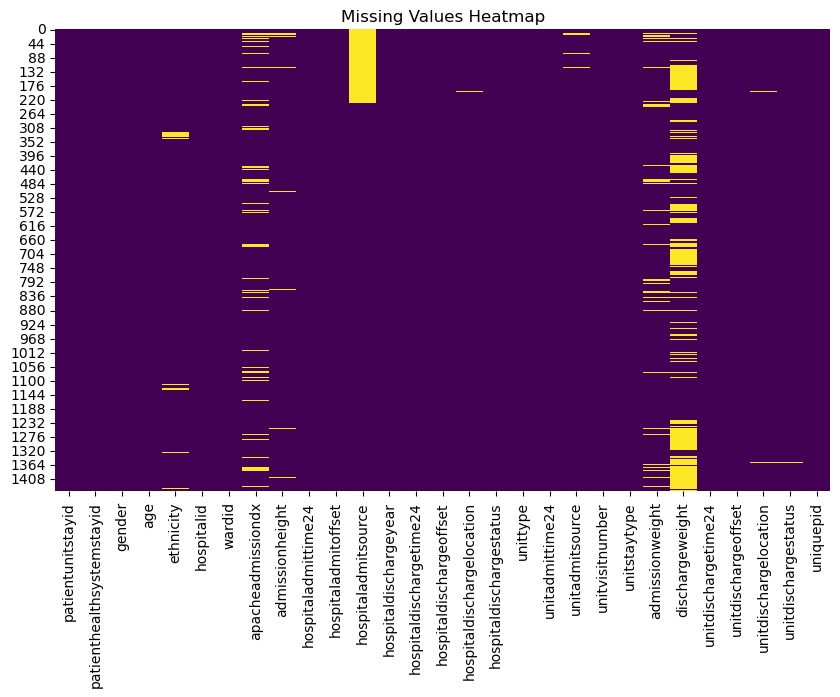

In [43]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [44]:
# Exploring Patient Demographics
print("\nUnique values in 'gender':")
print(df['gender'].value_counts())


Unique values in 'gender':
gender
Female     812
Male       633
Unknown      2
Name: count, dtype: int64


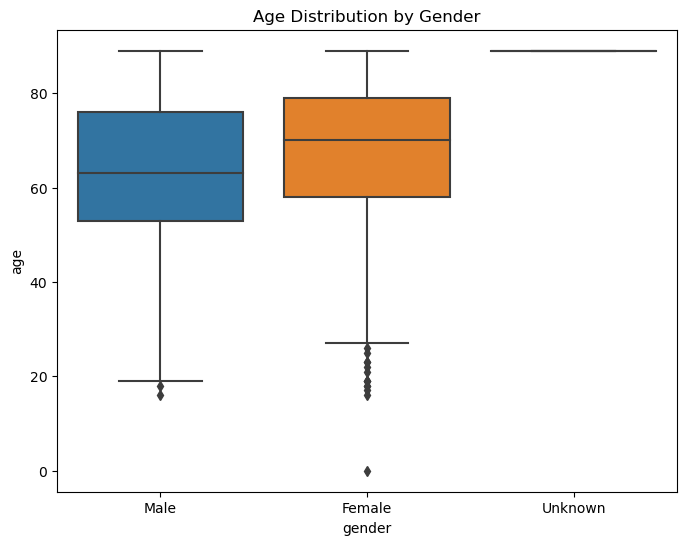

In [48]:
# Boxplot for Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.show()

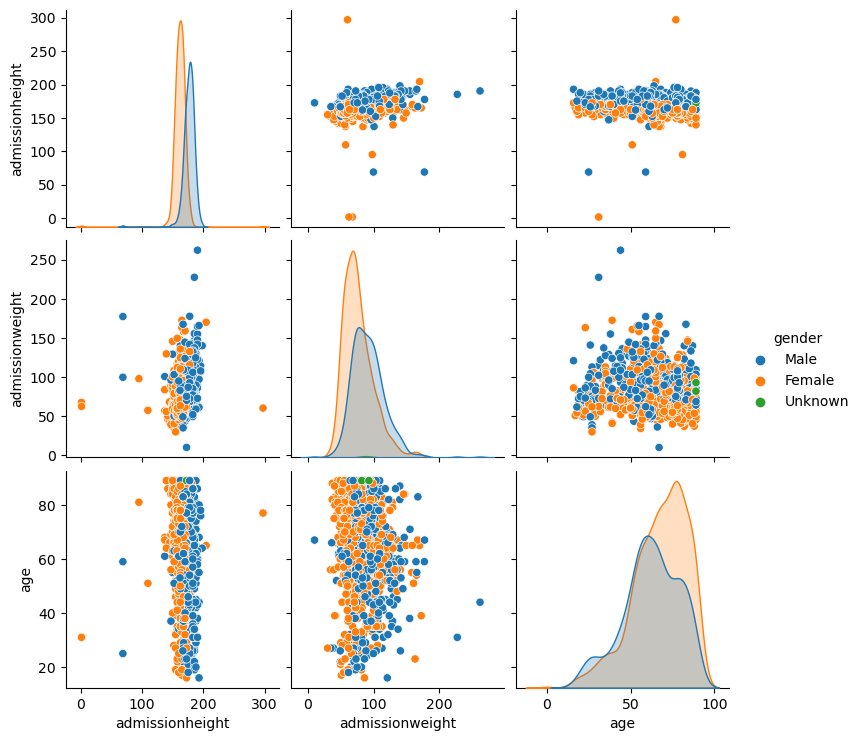

In [49]:
 #Plot pairwise relationships within the data using sns.pairplot
sns.pairplot(df[['admissionheight', 'admissionweight', 'age', 'gender']], hue='gender')
plt.show()

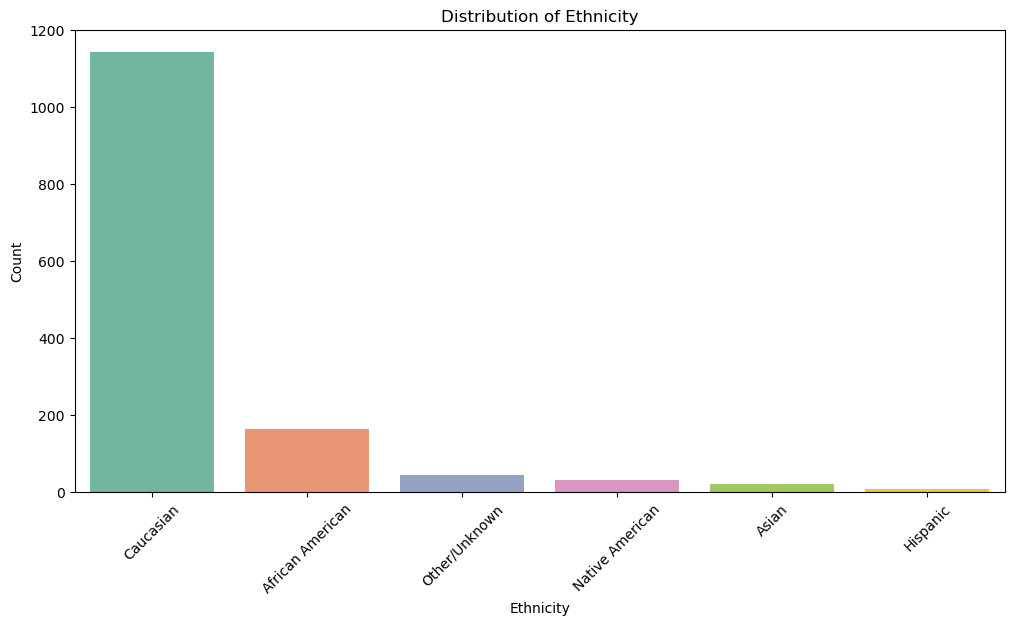

In [50]:
# Countplot for Ethnicity
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.countplot(x='ethnicity', data=df, palette='Set2')
plt.title('Distribution of Ethnicity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Ethnicity')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.show()

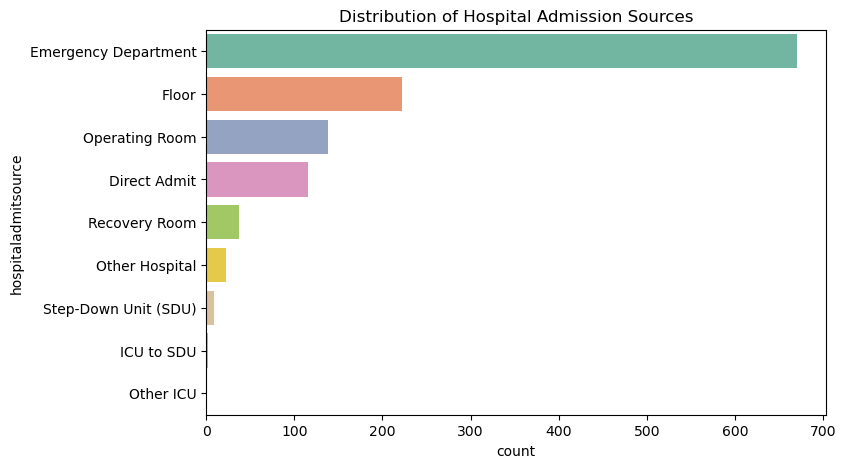


Distribution of admission sources:
hospitaladmitsource
Emergency Department    670
Floor                   222
Operating Room          138
Direct Admit            116
Recovery Room            37
Other Hospital           23
Step-Down Unit (SDU)      9
ICU to SDU                2
Other ICU                 1
Name: count, dtype: int64


In [62]:
# Analyzing hospital admissions and discharges
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='hospitaladmitsource', order=df['hospitaladmitsource'].value_counts().index, palette='Set2')
plt.title('Distribution of Hospital Admission Sources')
plt.show()

print("\nDistribution of admission sources:")
print(df['hospitaladmitsource'].value_counts())

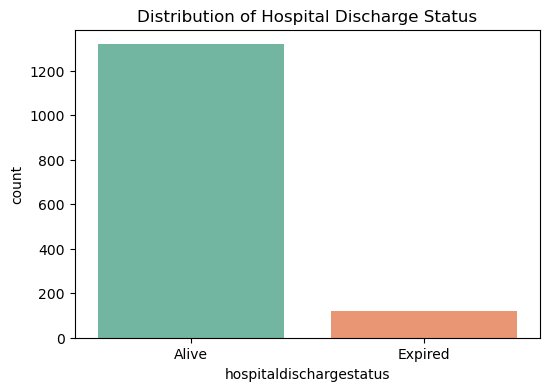


Distribution of hospital discharge status:
hospitaldischargestatus
Alive      1319
Expired     121
Name: count, dtype: int64


In [55]:
# Distribution of discharge status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hospitaldischargestatus', order=df['hospitaldischargestatus'].value_counts().index, palette='Set2')
plt.title('Distribution of Hospital Discharge Status')
plt.show()

print("\nDistribution of hospital discharge status:")
print(df['hospitaldischargestatus'].value_counts())

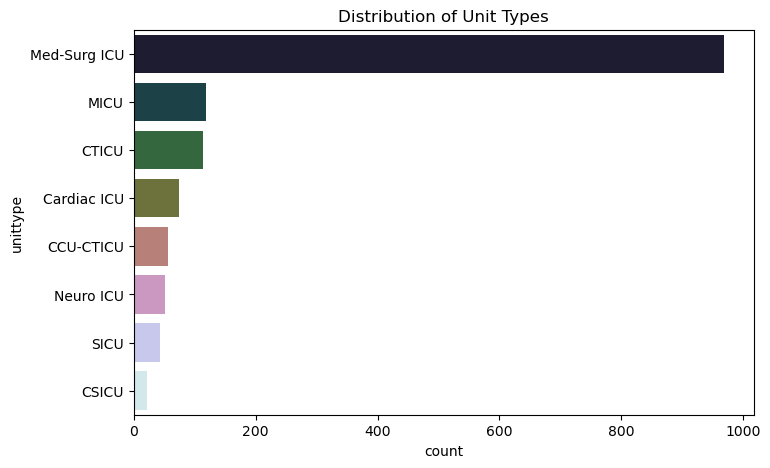


Distribution of unit types:
unittype
Med-Surg ICU    969
MICU            118
CTICU           114
Cardiac ICU      74
CCU-CTICU        56
Neuro ICU        51
SICU             43
CSICU            22
Name: count, dtype: int64


In [57]:
# Exploring unit information
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='unittype', order=df['unittype'].value_counts().index, palette='cubehelix')
plt.title('Distribution of Unit Types')
plt.show()

print("\nDistribution of unit types:")
print(df['unittype'].value_counts())

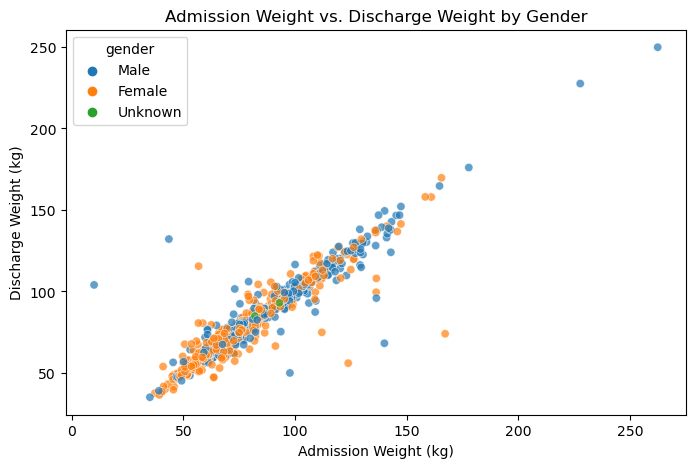

In [59]:
#Relationship between admission weight and discharge weight
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='admissionweight', y='dischargeweight', hue='gender', alpha=0.7)
plt.title('Admission Weight vs. Discharge Weight by Gender')
plt.xlabel('Admission Weight (kg)')
plt.ylabel('Discharge Weight (kg)')
plt.show()


Distribution of unit discharge status:
unitdischargestatus
Alive      1373
Expired      72
Name: count, dtype: int64


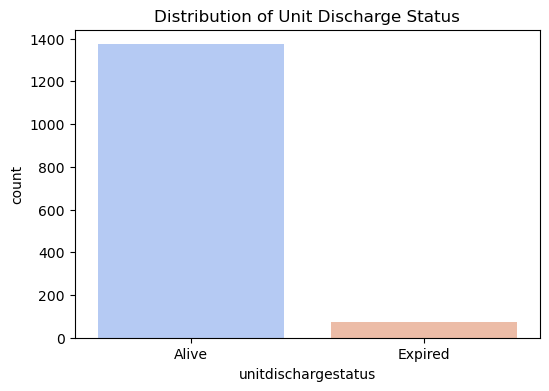

In [60]:
# Exploring unit discharge status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='unitdischargestatus', order=df['unitdischargestatus'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Unit Discharge Status')
plt.show()

print("\nDistribution of unit discharge status:")
print(df['unitdischargestatus'].value_counts())

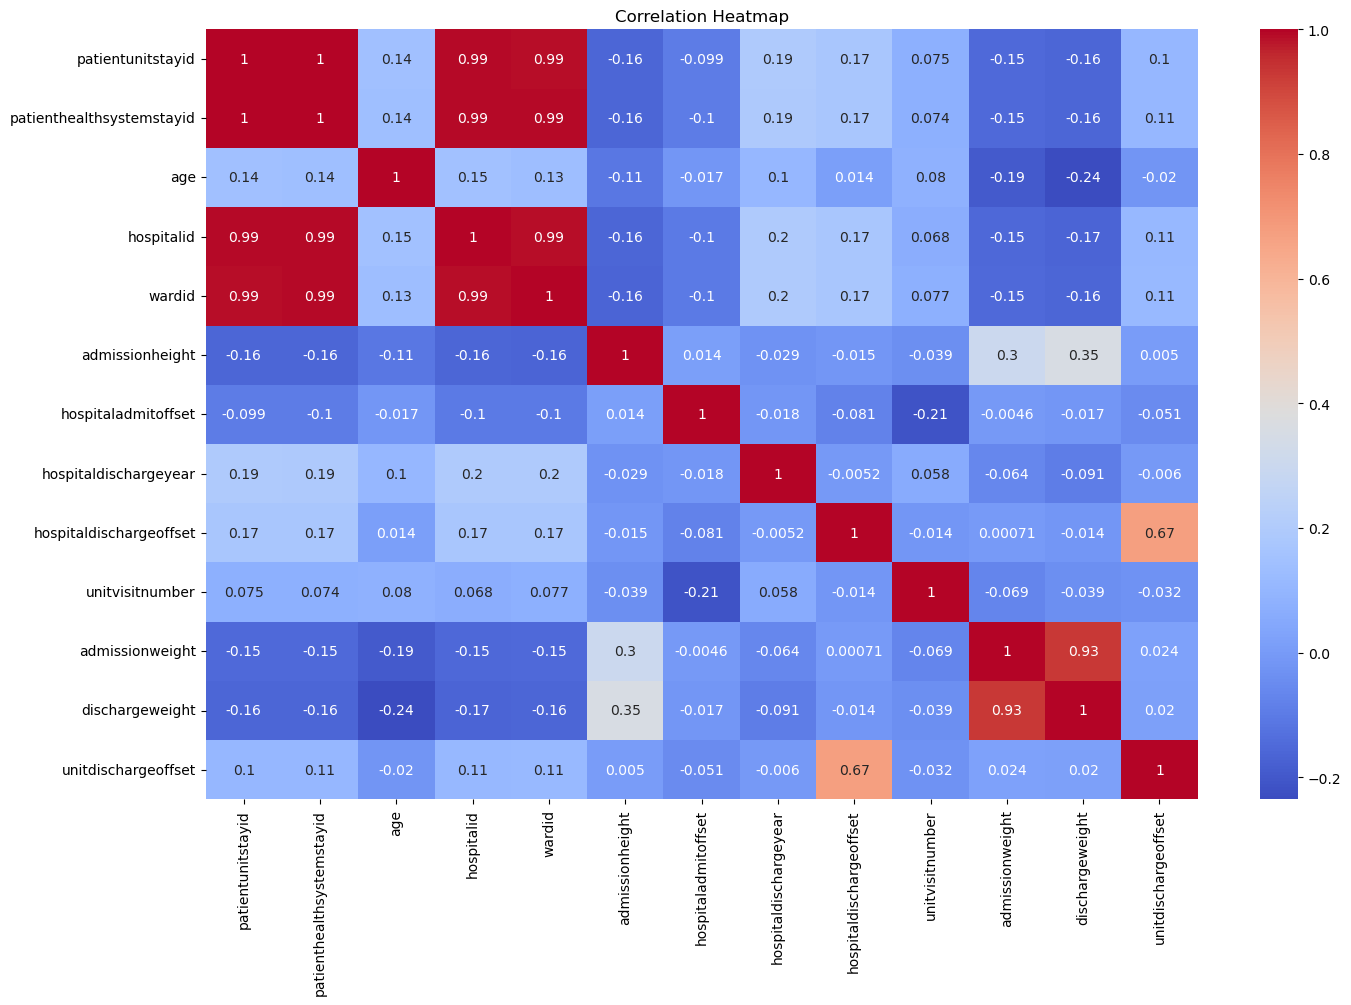

In [64]:
# Selecting only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=['number'])

# Basic correlation heatmap for numeric features
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

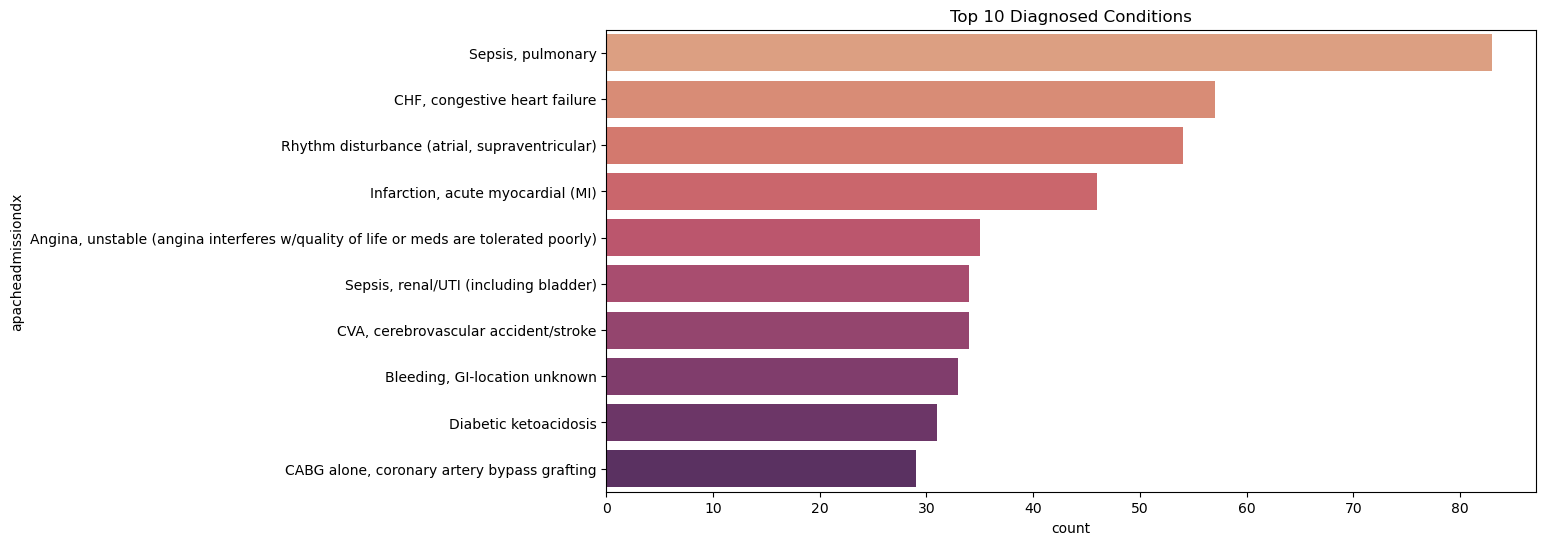


Top 10 Diagnosed Conditions:
apacheadmissiondx
Sepsis, pulmonary                                                                      83
CHF, congestive heart failure                                                          57
Rhythm disturbance (atrial, supraventricular)                                          54
Infarction, acute myocardial (MI)                                                      46
Angina, unstable (angina interferes w/quality of life or meds are tolerated poorly)    35
Sepsis, renal/UTI (including bladder)                                                  34
CVA, cerebrovascular accident/stroke                                                   34
Bleeding, GI-location unknown                                                          33
Diabetic ketoacidosis                                                                  31
CABG alone, coronary artery bypass grafting                                            29
Name: count, dtype: int64


In [66]:
# Explore disease diagnosis frequency
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='apacheadmissiondx', order=df['apacheadmissiondx'].value_counts().iloc[:10].index, palette='flare')
plt.title('Top 10 Diagnosed Conditions')
plt.show()

print("\nTop 10 Diagnosed Conditions:")
print(df['apacheadmissiondx'].value_counts().head(10))

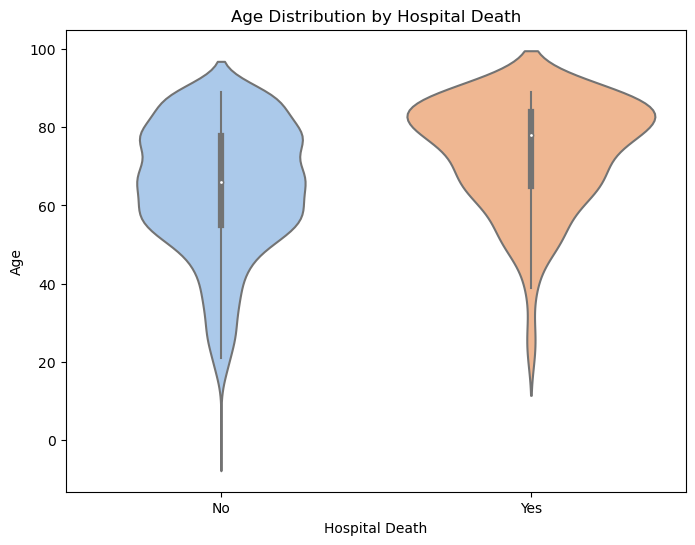

In [78]:
# Create a new column 'Hospital Death' based on the 'hospitaldischargestatus' column
df['Hospital Death'] = df['hospitaldischargestatus'].apply(lambda x: 'Yes' if x == 'Expired' else 'No')

# Violin plot for Age by Hospital Death
plt.figure(figsize=(8, 6))
sns.violinplot(x='Hospital Death', y='age', data=df, palette='pastel')
plt.title('Age Distribution by Hospital Death')
plt.xlabel('Hospital Death')
plt.ylabel('Age')
plt.show()